In [4]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(latex2exp)
options(repr.plot.width = 12, repr.plot.height = 8)

In [5]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

In [8]:
data <- read.csv("data/data.csv")
data

day_number,region,country,state,city,month,day,year,temp
<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<dbl>
1,Europe,Poland,NA,Warsaw,1,1,1995,35.4
2,Europe,Poland,NA,Warsaw,1,2,1995,30.5
3,Europe,Poland,NA,Warsaw,1,3,1995,27.2
4,Europe,Poland,NA,Warsaw,1,4,1995,22.9
5,Europe,Poland,NA,Warsaw,1,5,1995,18.7
6,Europe,Poland,NA,Warsaw,1,6,1995,19.7
7,Europe,Poland,NA,Warsaw,1,7,1995,21.6
8,Europe,Poland,NA,Warsaw,1,8,1995,26.6
9,Europe,Poland,NA,Warsaw,1,9,1995,27.4


In [15]:
new_data <- data[2730:4622,]
day <- new_data$day_number
temp <- new_data$temp

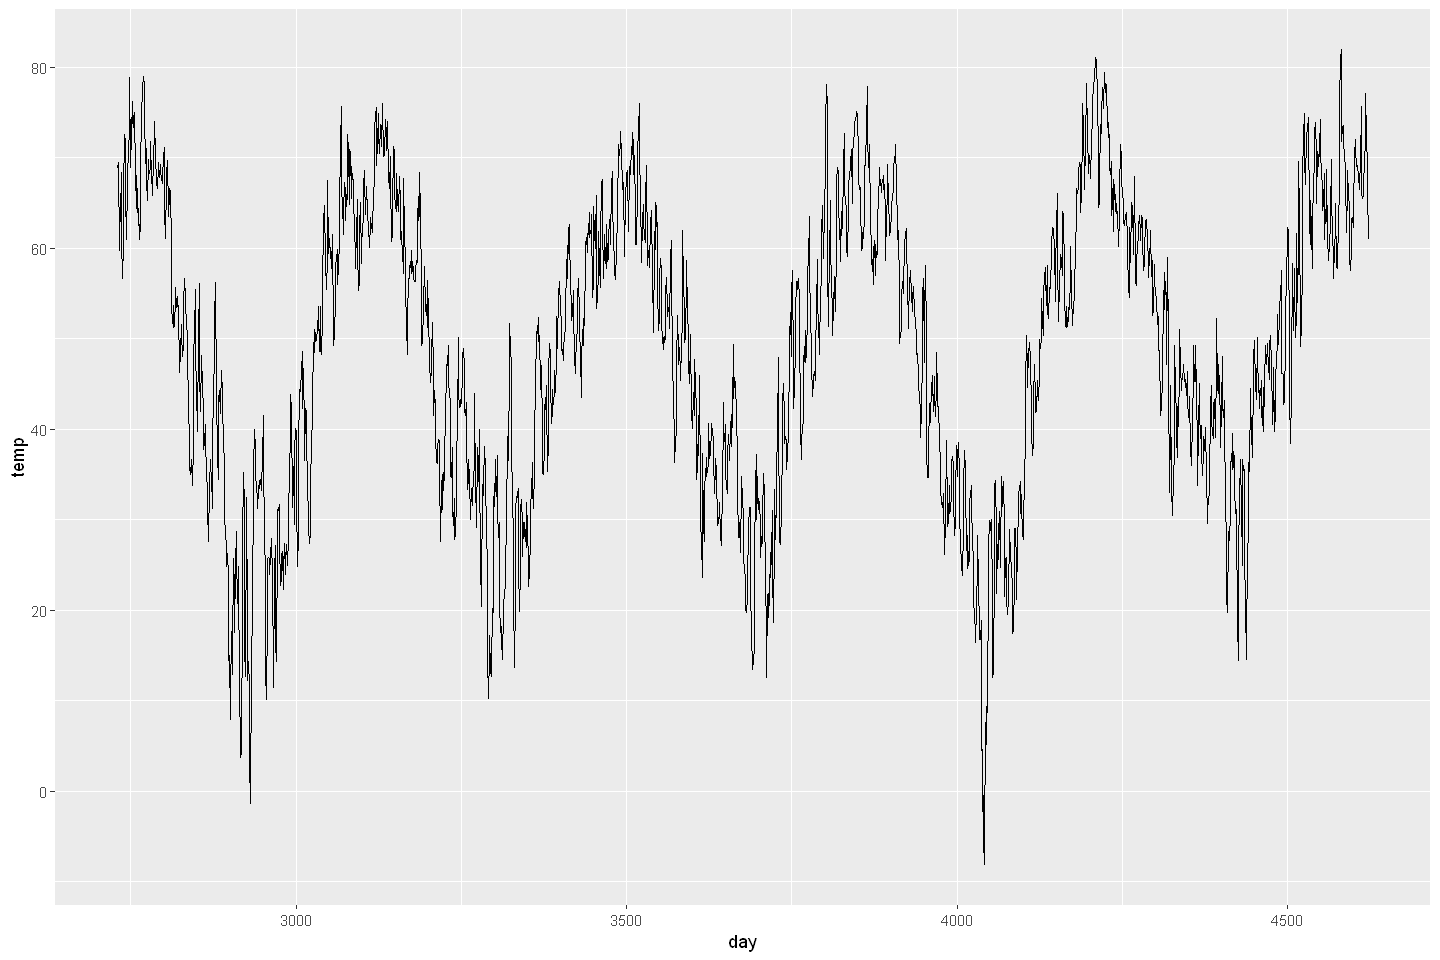

In [16]:
ggplot() + geom_line(aes(x=day, y=temp))

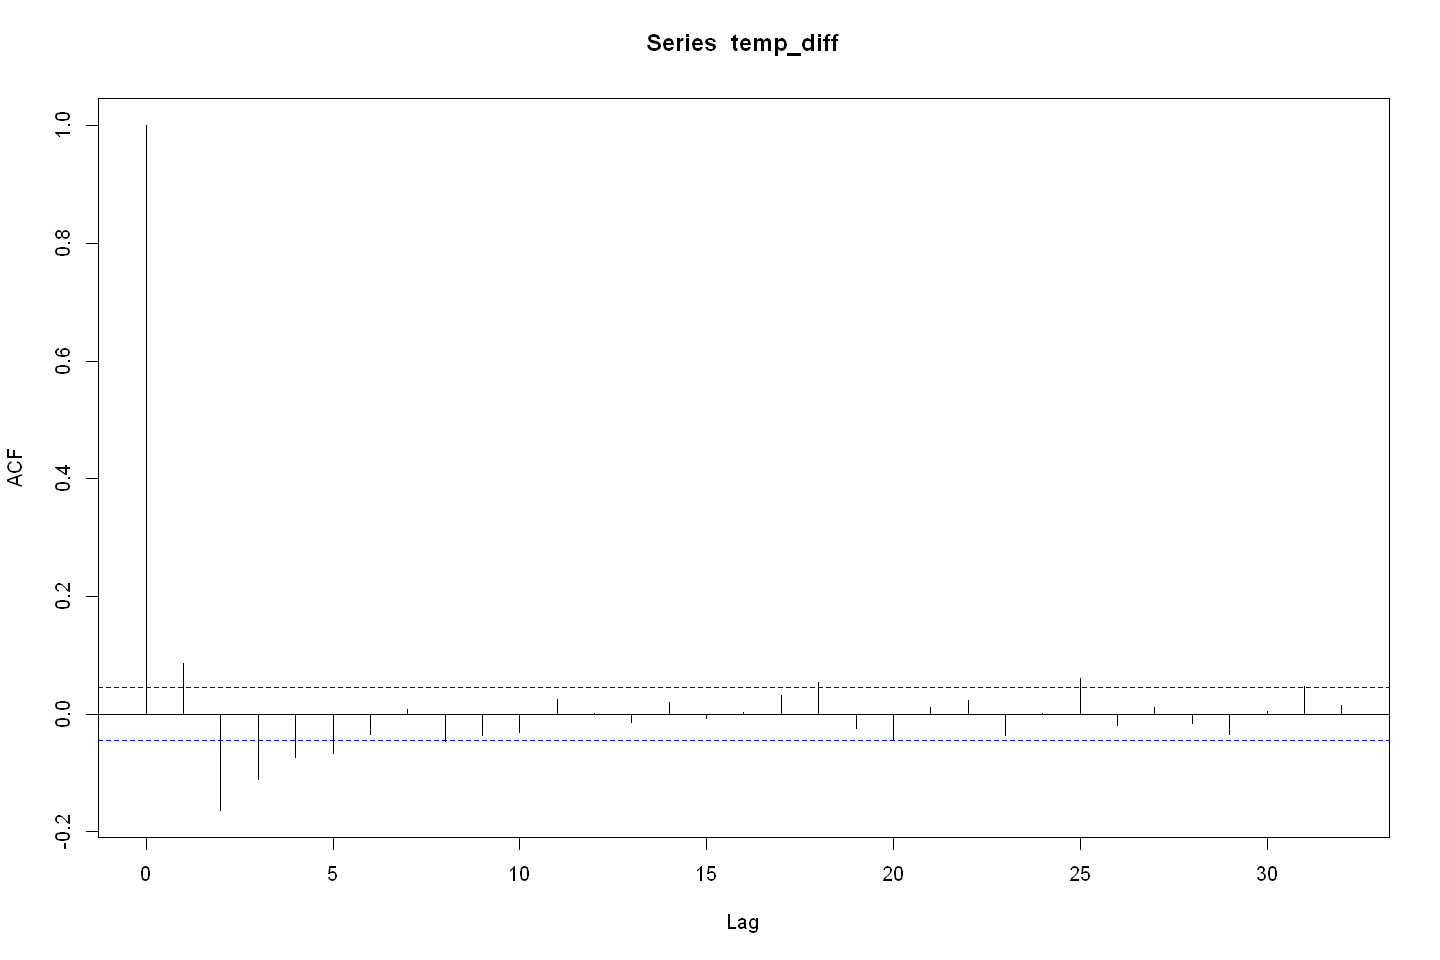

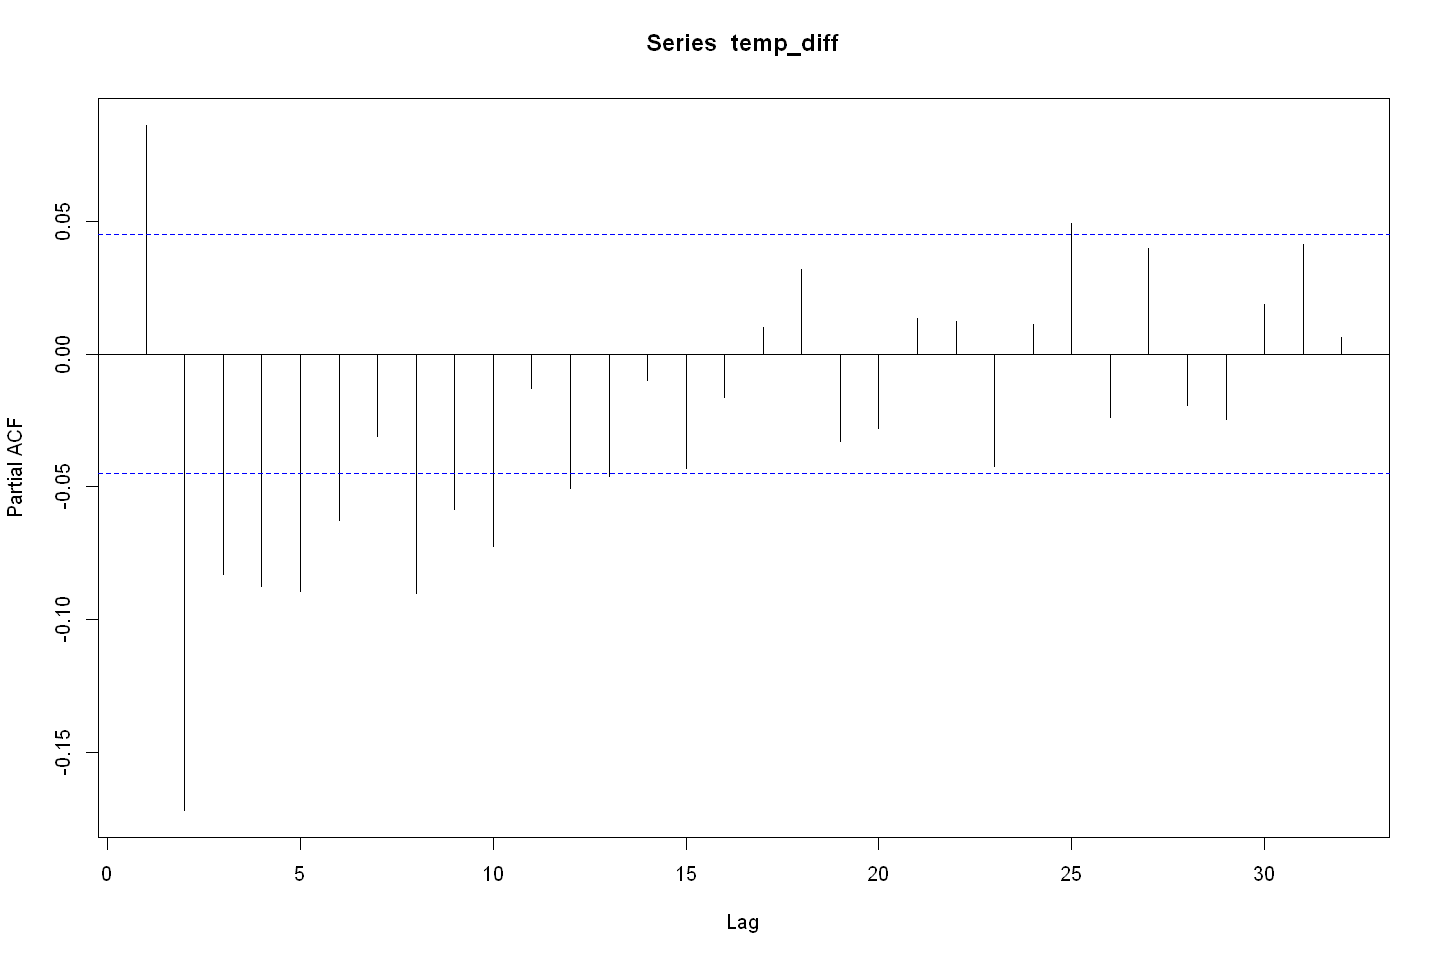

In [40]:
temp_diff <- diff(temp)
acf(temp_diff)
pacf(temp_diff)

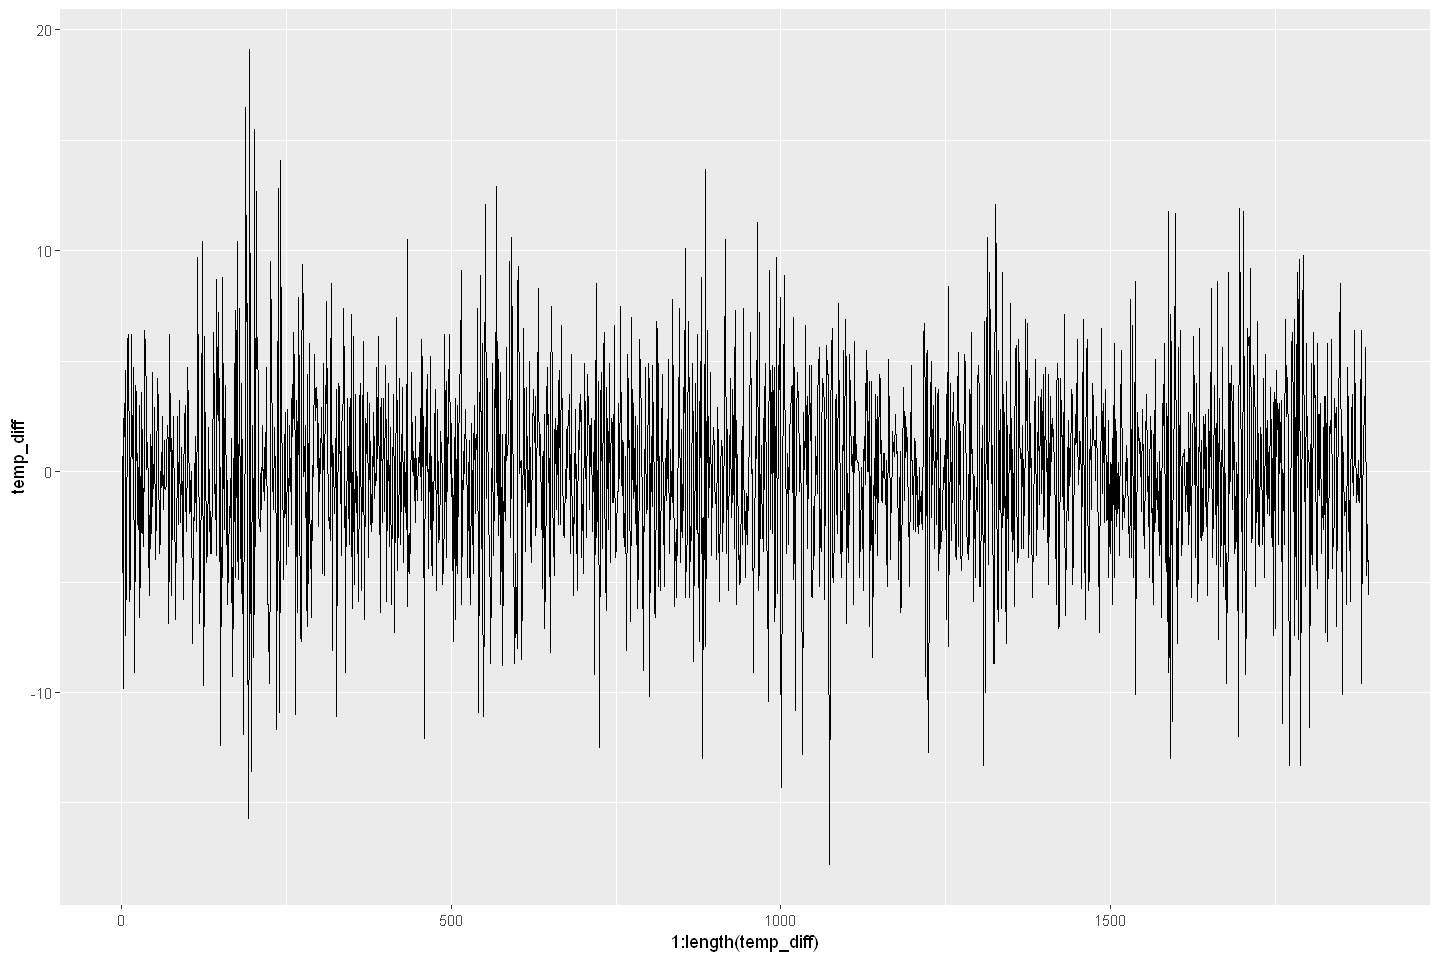

In [41]:
ggplot() + geom_line(aes(1:length(temp_diff), temp_diff))

In [39]:
p_max <- 5
q_max <- 5

AIC_values <- matrix(nrow=p_max+1, ncol=q_max+1)

for (p in 0:p_max){
  for (q in 0:q_max){
    model <- arima(temp_diff, order = c(p, 0, q))
    AIC_values[p+1, q+1] <- model$aic
  }
}

indices <- which(AIC_values == min(AIC_values), arr.ind = TRUE)
p_found <- indices[1]-1
q_found <- indices[2]-1
c(p_found, q_found)

Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(diff(temp), order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"


[1] 3 4

In [42]:
model <- arima(y, order = c(3, 0, 4))

print(model)

coefficients <- model$coef
coef_sigma2 <- model$sigma2
AIC_value <- model$aic
residuals <- model$residuals


Call:
arima(x = y, order = c(3, 0, 4))

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"wyprodukowano wartości NaN"


         ar1      ar2      ar3     ma1     ma2     ma3      ma4  intercept
      0.2685  -0.4513  -0.0595  0.7412  0.3848  0.0284  -0.0035     0.0007
s.e.     NaN      NaN      NaN     NaN     NaN     NaN   0.0169     0.0346

sigma^2 estimated as 3.996:  log likelihood = -21116.62,  aic = 42251.23


In [2]:
library(stats)
set.seed(12345)


#symulacja trajektorii ARMA(2,2)
#phi1 = 0.4, phi2 = -0.5, theta1 = 0.6, theta2 = 0.3, sigma = 2
y <- arima.sim(model = list(order = c(2,0,2), ar = c(0.4,-0.5), ma = c(0.6,0.3)), n = 10000, sd = 2)

#dobieranie modelu ARMA do danych (dla wybranych rz�d�w p=2,q=2)
#(za��my, �e dane to wysymulowana wczesniej trajektoria y)
p1 <- 2
q1 <- 2
y <- y - mean(y) #odjecie sredniej od danych
model <- arima(y,order=c(p1,0,q1))

print(model) #og�lne "podsumowanie" dobranego modelu

coefficients <- model$coef #warto�ci wsp�czynnik�w dobranego modelu (bez sigma^2)
coef_sigma2 <- model$sigma2 #warto�� wyestymowanej sigma^2

AIC_value <- model$aic #wartosc kryterium informacyjnego AIC

residuals <- model$residuals #wektor residu�w

######
#update: wyb�r rz�d�w p,q przy u�yciu kryterium informacyjnego AIC
#sprawdzamy wszystkie kombinacje p,q dla p=0,1,...,p_max, q=0,1,...,q_max 
#dla ka�dej z nich dobieramy model ARMA(p,q) i liczymy warto�� AIC
#we�my p_max = 5, q_max = 5
p_max <- 5
q_max <- 5

AIC_values <- matrix(nrow=p_max+1, ncol=q_max+1) #macierz warto�ci AIC dla wszystkich sprawdzanych modeli 
#(element w i-tym wierszu i j-tej kolumnie to warto�� AIC dla modelu ARMA(i-1,j-1))

for (p in 0:p_max){
  for (q in 0:q_max){
    model <- arima(y,order=c(p,0,q))
    AIC_values[p+1,q+1] <- model$aic
  }
}

indices <- which(AIC_values == min(AIC_values), arr.ind = TRUE) #szukamy indeks�w macierzy, dla kt�rej dostali�my najmniejsze AIC
#wysz�o 3,3, co prowadzi nas do modelu:
p_found <- indices[1]-1
q_found <- indices[2]-1
#...ARMA(2,2) (czyli dok�adnie ten, z kt�rego symulowali�my badan� pr�b�).
p_found
q_found


Call:
arima(x = y, order = c(p1, 0, q1))

Coefficients:
         ar1      ar2     ma1     ma2  intercept
      0.3867  -0.5041  0.6235  0.3193     0.0000
s.e.  0.0191   0.0117  0.0205  0.0165     0.0348

sigma^2 estimated as 3.996:  log likelihood = -21116.66,  aic = 42245.32


[1] 2

[1] 2